In [1]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
# import functions from modsim

from modsim import *

In [3]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [4]:
from pandas import read_html

filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']

In [5]:
un = table2.un / 1e9
census = table2.census / 1e9

In [6]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap06.py')

Downloaded chap06.py


In [7]:
from chap06 import run_simulation

def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year',
             ylabel='World population (billions)')

In [8]:
def growth_func_quad(t, pop, system):
    return system.alpha * pop + system.beta * pop**2

In [9]:
t_0 = census.index[0]
p_0 = census[t_0]
t_end = census.index[-1]

system = System(t_0=t_0,
                p_0=p_0,
                t_end=t_end)

In [10]:
system.alpha = 25 / 1000
system.beta = -1.8 / 1000

And here's how we run it:

In [11]:
results = run_simulation(system, growth_func_quad)

Here are the results.

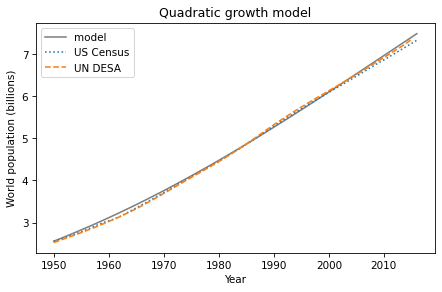

In [12]:
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Quadratic growth model')

In [13]:
from numpy import linspace

pop_array = linspace(0, 15, 101)

Now I'll use the quadratic model to compute net growth for each population.

In [14]:
growth_array = (system.alpha * pop_array +
                system.beta * pop_array**2)

To plot growth rate versus population, we'll use the `plot` function from Matplotlib.
First we have to import it:

In [15]:
from matplotlib.pyplot import plot

Now we can use it like this:

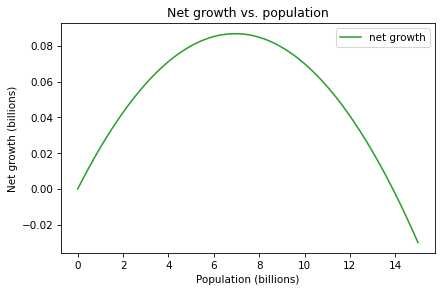

In [16]:
plot(pop_array, growth_array, label='net growth', color='C2')

decorate(xlabel='Population (billions)',
         ylabel='Net growth (billions)',
         title='Net growth vs. population')

In [17]:
-system.alpha / system.beta

13.88888888888889

In [18]:
def carrying_capacity(system):
    K = -system.alpha / system.beta
    return K

sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

13.88888888888889


Now let's see all the ways that can go wrong.

In [19]:
def carrying_capacity():
    K = -sys1.alpha / sys1.beta
    return K

sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity()
print(pop)

13.88888888888889


In [20]:
# WRONG
def carrying_capacity(system):
    system = System(alpha=0.025, beta=-0.0018)
    K = -system.alpha / system.beta
    return K

sys1 = System(alpha=0.03, beta=-0.002)
pop = carrying_capacity(sys1)
print(pop)

13.88888888888889


In [21]:
# WRONG
def carrying_capacity(system):
    K = -system.alpha / system.beta

sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

None


## Exercises

In [31]:
diff = census.diff()
show(diff.head())

,census
Year,
1950,NaN
1951,0.037311
1952,0.041832
1953,0.045281
1954,0.048175


In [32]:
alpha = census.diff() / census
show(alpha.head())

,census
Year,
1950,NaN
1951,0.014378
1952,0.015865
1953,0.016883
1954,0.017645


In [33]:
def plot_alpha():
    alpha_census = census.diff() / census
    alpha_census.plot(style='.', label='US Census')

    alpha_un = un.diff() / un
    alpha_un.plot(style='.', label='UN DESA')

    decorate(xlabel='Year', ylabel='Net growth rate')

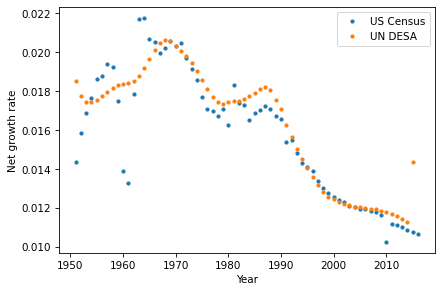

In [34]:
plot_alpha()

In [35]:
def alpha_func(t):
    intercept = 0.02
    slope = -0.00021
    return intercept + slope * (t - 1970)

In [36]:
t_array = linspace(1960, 2020, 5)
alpha_array = alpha_func(t_array)

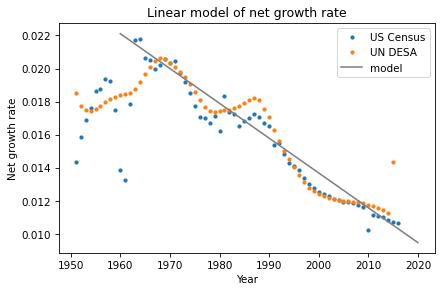

In [37]:
from matplotlib.pyplot import plot

plot_alpha()
plot(t_array, alpha_array, label='model', color='gray')

decorate(ylabel='Net growth rate',
         title='Linear model of net growth rate')

In [38]:
t_0 = 1960
t_end = 2100
p_0 = census[t_0]

In [39]:
system = System(t_0=t_0,
                t_end=t_end,
                p_0=p_0,
                alpha_func=alpha_func)

In [40]:
def growth_func_alpha(t, pop, system):
    return system.alpha_func(t) * pop

In [41]:
growth_func_alpha(t_0, p_0, system)


0.06725033332680001

In [ ]:
results2 = run_simulation(system, growth_func_alpha);


In [ ]:
results2.plot(color='gray', label='model')
plot_projections(table3)
decorate(title='Proportional model, linearly decreasing rate')
results2.idxmax(), results2.max()
